# Part 1 - Create model for binary classification of normal and abnormal heartbeats


In [ ]:
##imports for reading dataframes, splitting, and evaluating
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#read dataframes
normal = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cardio_2/ptbdb_abnormal.csv', header=None)

**Concatenate normal and abnormal data, train/test split**

In [ ]:
##concatenate dataframes
task_1 = pd.concat([normal, abnormal], axis =0, ignore_index=True)
task_1 = task_1.rename(columns={187: 'Label'})

print(task_1.columns)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           178,     179,     180,     181,     182,     183,     184,     185,
           186, 'Label'],
      dtype='object', length=188)


In [ ]:
Y_col = 'Label'
x = task_1.loc[:, task_1.columns != Y_col].columns

##split train and test, separating the label column (intended output)
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.3, random_state=42)


In [ ]:
X_train.shape

(10186, 187)


**Logistic regression model**

In [ ]:
#imports for neural network
import torch
from sklearn.preprocessing import LabelEncoder
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import tqdm
import copy

#Imports for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Logistic regression model
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print('accuracy: ', acc)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

accuracy:  0.8213467704993128
precision: 0.81
recall: 0.82
f1_score: 0.81


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Preprocesses data using StandardScaler class to ensure fits model
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(score)

0.8273018781493358


In [ ]:
# Logistic regression model using 10% testing proportion -> 83.65% accurate
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(task_1[x], task_1[Y_col],test_size=0.1, random_state=42)

from sklearn.metrics import f1_score # Import the f1_score function

reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
reg = reg.fit(X_train_two, y_train_two)
y_pred_two = reg.predict(X_test_two)
testingAcc = accuracy_score(y_test_two, y_pred_two) # Use y_pred_two here to match y_test_two

print(0.1)

print('accuracy: ', testingAcc)
print('precision: %.4f' % precision_score(y_test_two, y_pred_two,average='weighted'))
print('recall: %.4f' % recall_score(y_test_two, y_pred_two,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test_two, y_pred_two,average='weighted'))


0.1
accuracy:  0.8365384615384616
precision: 0.8306
recall: 0.8365
f1_score: 0.8316


In [ ]:
cm = confusion_matrix(y_test_two, y_pred_two)
print("Confusion matrix for logistic regression:")
print(cm)

Confusion matrix for logistic regression:
[[237 151]
 [ 87 981]]


In [ ]:
print("Logistic Regression model accuracy with Random State 0:", acc*100)
print("Logistic Regression model accuracy with preprocessing:", score*100)
print("Logistic Regression model accuracy with testing size 0.1:", testingAcc*100)

Logistic Regression model accuracy with Random State 0: 82.13467704993128
Logistic Regression model accuracy with preprocessing: 82.73018781493357
Logistic Regression model accuracy with testing size 0.1: 83.65384615384616




**Random Forests**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.10, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#imports for RandomForest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random forest model accuracy: {accuracy}")

print('accuracy: ', accuracy)
print('precision: %.4f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.4f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.4f' % f1_score(y_test, y_pred,average='weighted'))

Random forest model accuracy: 0.9725274725274725
accuracy:  0.9725274725274725
precision: 0.9725
recall: 0.9725
f1_score: 0.9723


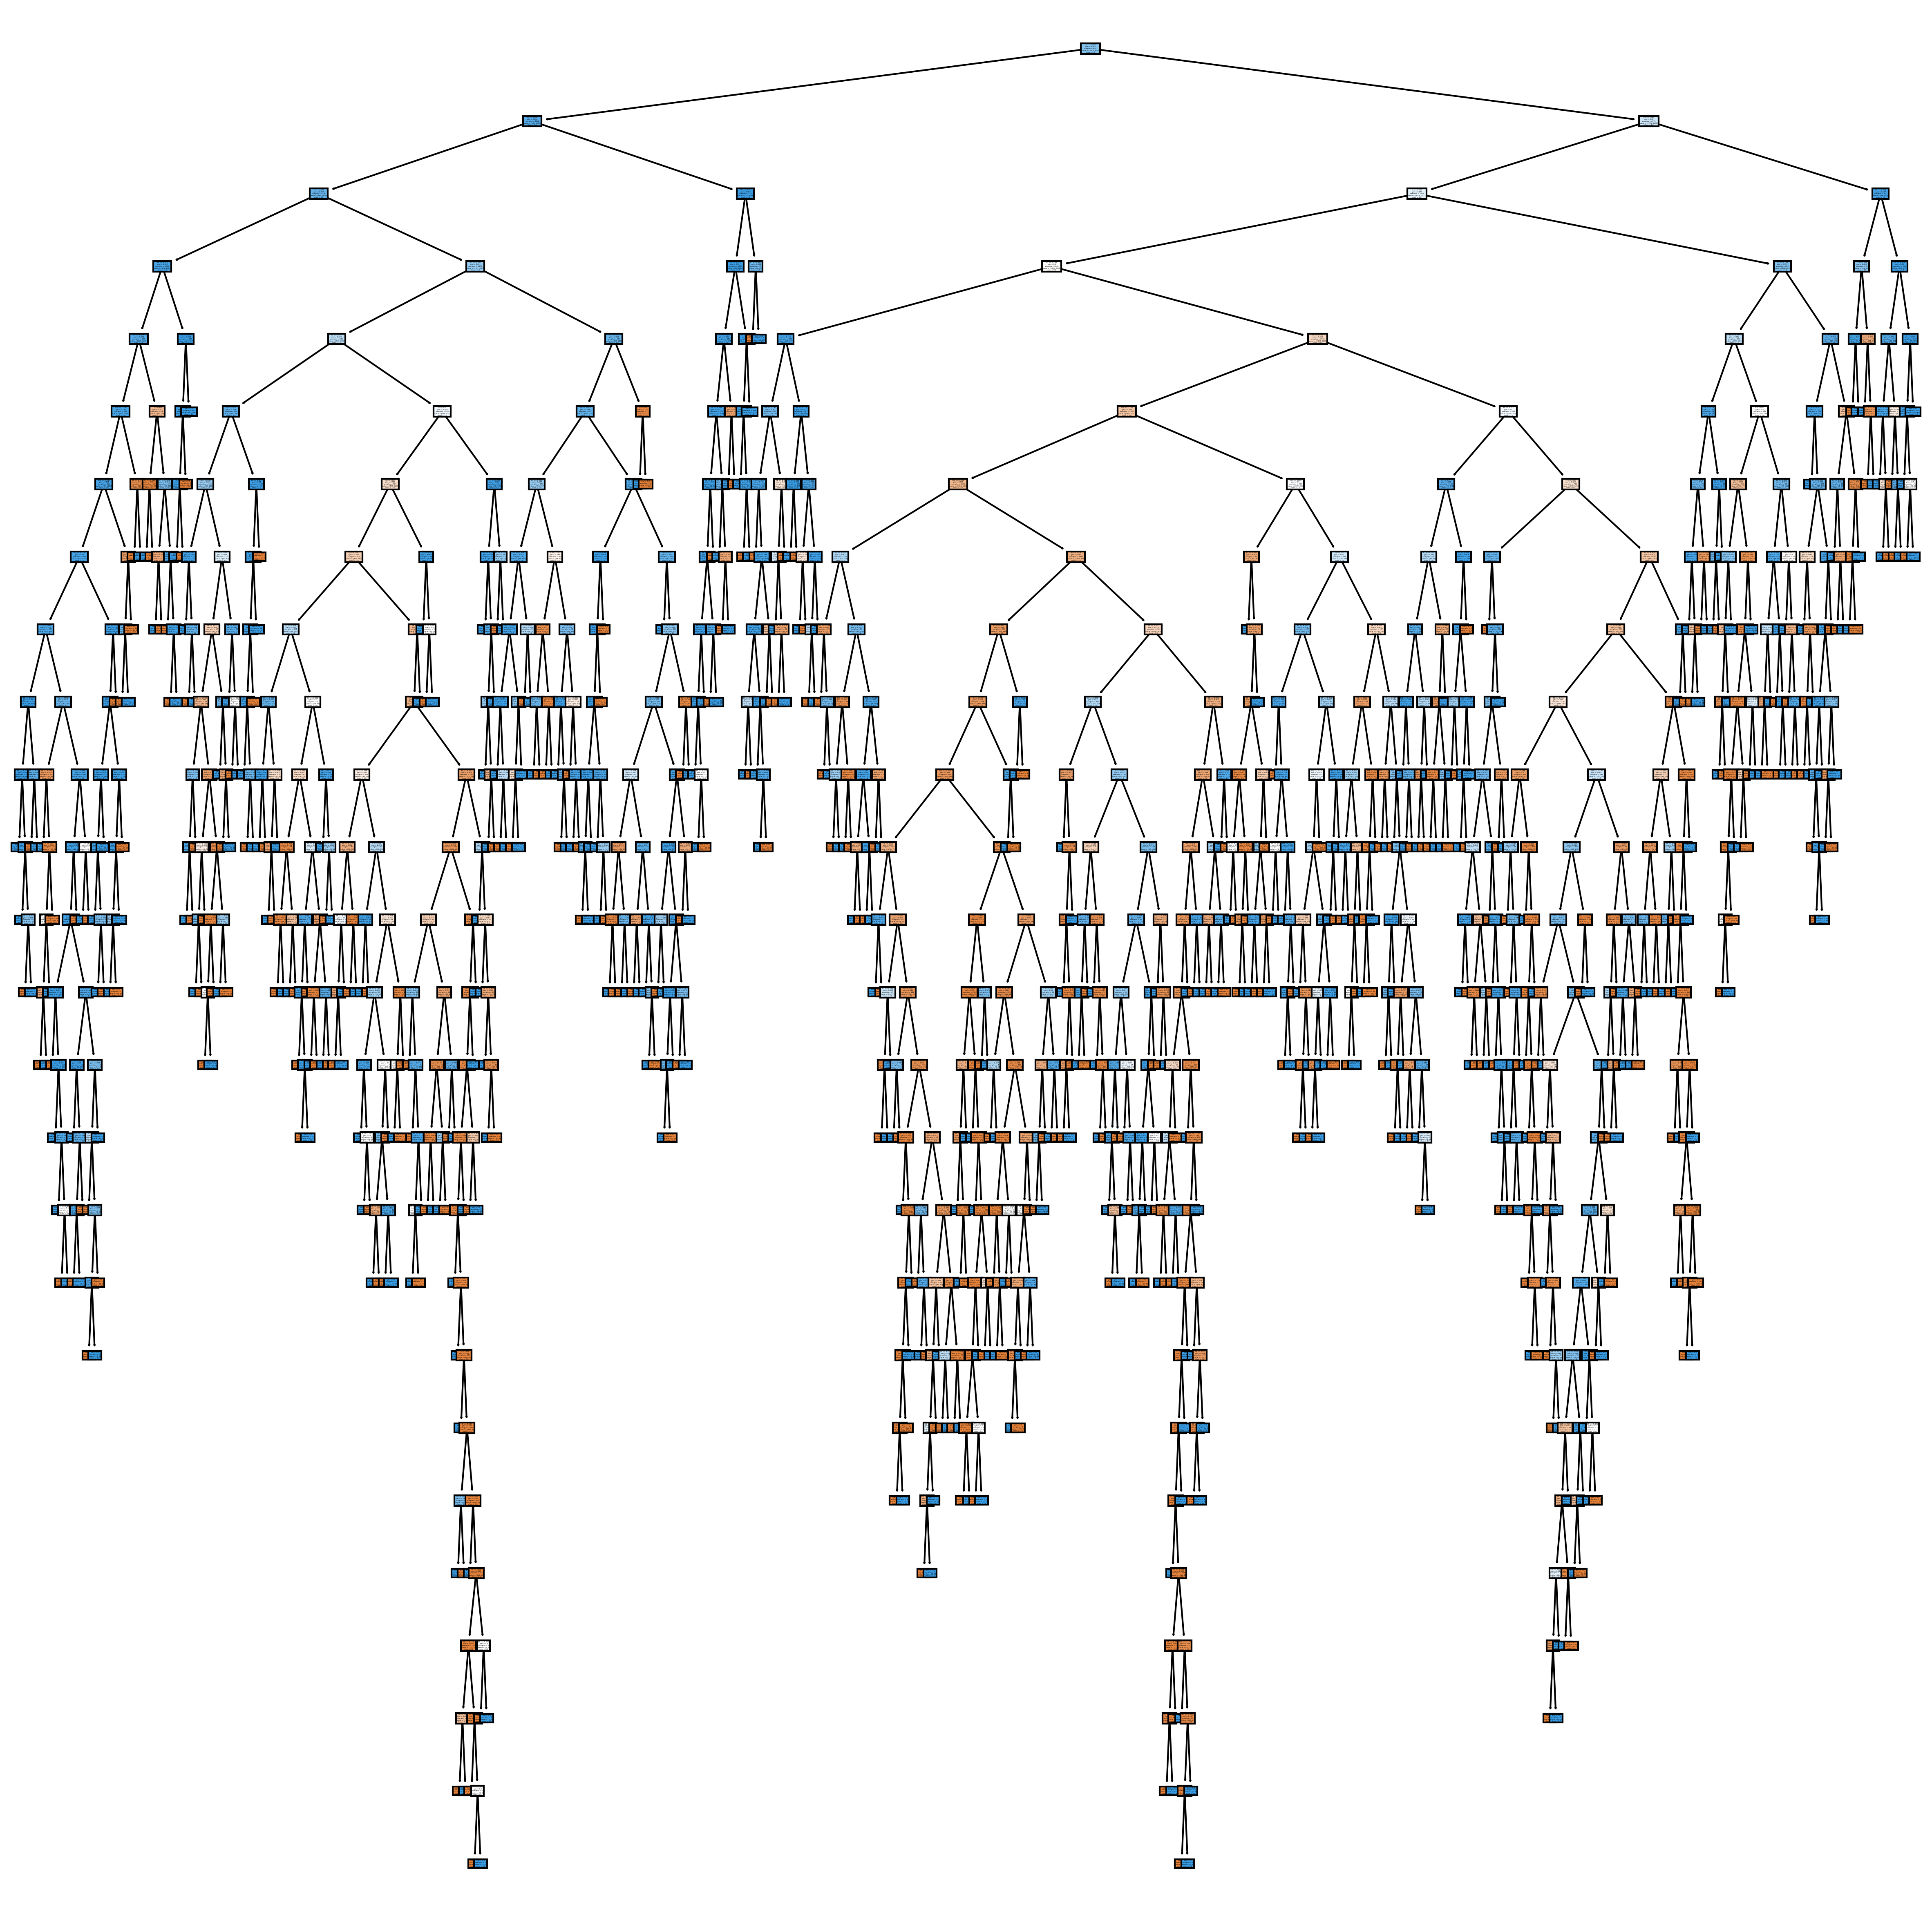

In [ ]:
from sklearn import tree

X = task_1.drop(columns=[Y_col])
y = task_1[Y_col]

# Extracting feature names and defining class names
fn = X.columns.tolist()
cn = y.unique().astype(str).tolist()

# Visualizing ONE of the decision trees in the RandomForest
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20), dpi=300)
tree.plot_tree(randomForest.estimators_[0],
               feature_names=fn,
               class_names=cn,
               filled=True)
fig.savefig('rf_individualtree.png')
plt.show()


<Axes: >

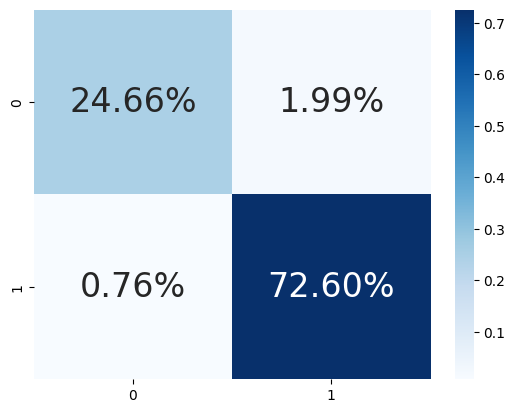

In [ ]:
import numpy as np
import seaborn as sns

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 24})


**Neural networks**

In [ ]:
#imports for neural networks
import tensorflow as tf

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(task_1[x], task_1[Y_col],test_size=0.10, random_state=42)

#Change data and labels to TF tensors - 1D tensor constants
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [ ]:
# Create the model
import tensorflow as tf
from tensorflow.keras import metrics

model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(256, activation="relu"),
                  tf.keras.layers.Dense(128, activation="relu"),
                  tf.keras.layers.Dense(1, activation="sigmoid")
 ])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy", metrics.Precision(), metrics.Recall(), metrics.F1Score()])

# Fit the model, use tf.cast to change the data type to float32
history = model.fit(X_train, tf.cast(tf.expand_dims(y_train, axis=-1), tf.float32), epochs=50, validation_data=(X_test, tf.cast(tf.expand_dims(y_test, axis=-1), tf.float32)), verbose=0)
model.evaluate(X_test, tf.expand_dims(y_test, axis=-1))


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9697 - f1_score: 0.8614 - loss: 0.1489 - precision: 0.9886 - recall: 0.9703


[0.12927508354187012,
 0.9752747416496277,
 0.9867924451828003,
 0.9794007539749146,
 0.8571428060531616]

In [ ]:
model.summary()

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          24,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,341 (1.03 MB)

 Trainable params: 90,113 (352.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 180,228 (704.02 KB)

Our model has 90113 neurons and 97.60% accuracy. It uses ReLU activation function, binary crossentropy loss function, and Adam optimizer.

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

!pip install visualkeras

import visualkeras
visualkeras.layered_view(model)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 19.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


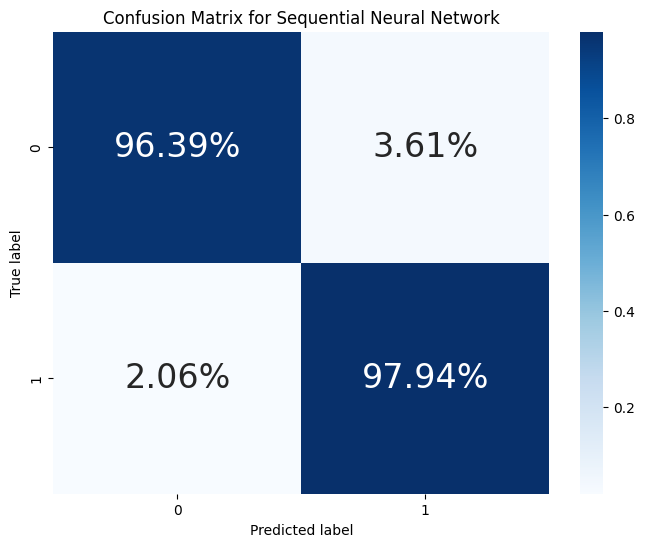

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

cm_nn = confusion_matrix(y_test, y_pred_nn)

cm_nn_percent = cm_nn.astype('float') / cm_nn.sum(axis=1)[:, np.newaxis]

#cm plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_percent, annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 24})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Sequential Neural Network')
plt.show()


# Results: Models and Accuracies:


*   Logistic Regression w/ preprocessing

Accuracy: 82.73%
*   Logistic Regression

Accuracy: 83.65%
*   Random Forest

Accuracy: 97.25%
*   **Neural network**

**Accuracy: 97.60%**




Label
1.0    10506
0.0     4046
Name: count, dtype: int64


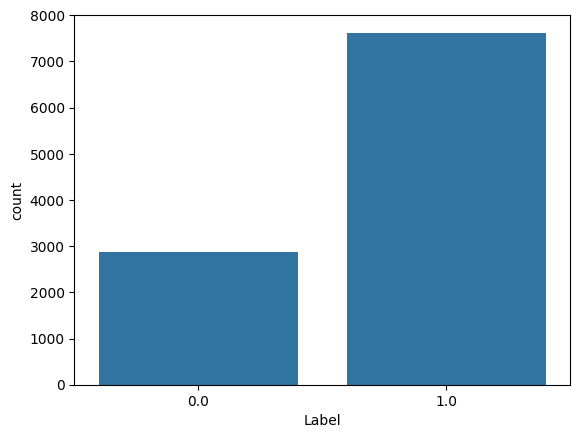

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=task_1)
print(task_1['Label'].value_counts())


Some class imbalance - address by downsampling abnormal?